# G-Market 상품 이미지 Crawling

In [1]:
import pandas as pd
import requests, os
from PIL import Image as pil

In [2]:
# Path 확인
# %ls

In [3]:
# 이미지 저장할 디렉토리 생성
path = 'data'
if not os.path.exists(path):  # 해당 디렉토리 존재 유무 확인
    os.makedirs(path)

In [4]:
# 크롤링 하였던 상품의 DataFrame 로드 : image link
df = pd.read_csv('gmarket.csv')
df.head()

,title,o_price,s_price,img
0,3900원 균일가 시즌오프 블라우스/티셔츠/원피스/팬츠 外,"13,000원","3,900원",http://gdimg.gmarket.co.kr/2266434001/still/30...
1,청정우 양지 300gX3팩,"31,800원","15,900원",http://gdimg.gmarket.co.kr/1587075039/still/30...
2,[한상궁김치]한상궁김치 국산 겉절이 2kg 출고당일생산,NaN,"15,900원",http://gdimg.gmarket.co.kr/1798110680/still/30...
3,[키스포]12%쿠폰 아동 주니어 여름 클리어런스+가을 프리뷰 모음전,"22,000원","6,600원",http://gdimg.gmarket.co.kr/336394693/still/300...
4,DCOVERS/디커버스/반팔티/티셔츠/여성/남자/빅사이즈,"26,300원","7,900원",http://gdimg.gmarket.co.kr/2514963907/still/30...


In [5]:
# 여러개의 이미지 다운로드
for idx, data in df[:3].iterrows():
    filename = '0' * (3 - len(str(idx))) + str(idx) + '.png'
    print(idx, filename, data['img'])
    response = requests.get(data['img'])
    with open(f'{path}/{filename}', 'wb') as file:
        file.write(response.content)

0 000.png http://gdimg.gmarket.co.kr/2266434001/still/300?ver=2022080509
1 001.png http://gdimg.gmarket.co.kr/1587075039/still/300?ver=2022080509
2 002.png http://gdimg.gmarket.co.kr/1798110680/still/300?ver=2022080509


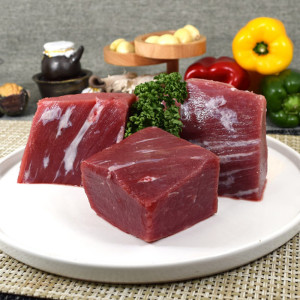

In [6]:
# 이미지 확인
pil.open(f'{path}/001.png')

# 개인 작업용 Jupyter에 라이브러리 초기 세팅하기

In [7]:
# !ipython profile create   -> ipython profile 생성
# !dir C:\Users\User\.ipython -> ipython profile 생성 확인
# ↓↓↓↓↓↓↓↓↓↓↓초기 설정 라이브러리 등록↓↓↓↓↓↓↓↓↓↓↓↓↓
# %%writefile C:\Users\User\.ipython\profile_default\startup\00-first.py
# import pandas as pd
# import numpy as np
# import requests
# from bs4 import BeautifulSoup
# ↓↓↓↓↓↓↓↓↓↓↓등록 여부 확인↓↓↓↓↓↓↓↓↓↓↓↓↓
# %load C:\Users\User\.ipython\profile_default\startup\00-first.py

# Selenium을 활용한 자동화

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [9]:
driver = webdriver.Chrome()
driver.get('https://daum.net')
driver.set_window_size(400, 400)
driver.execute_script('window.scrollTo(0, 0);')
driver.execute_script("alert('hello selenium!');")
alert = driver.switch_to.alert
alert.accept()
driver.find_element(By.CSS_SELECTOR, "#q").send_keys("파이썬")
driver.find_element(By.CSS_SELECTOR, ".inner_search > .ico_pctop.btn_search").click()
driver.quit()

# 간단한 Machine Learning (선형회귀)

In [10]:
from sklearn.linear_model import LinearRegression
# ram >> ssd 저장
import pickle

In [11]:
df = pd.read_csv('premierleague.csv')

In [12]:
# 학습
feature = df[['gf', 'ga']]
target = df['points']
model = LinearRegression().fit(feature, target)

In [13]:
# 모델 사용
# 데이터 예측 : 득점 80, 골 득실 36
np.round(model.predict([[80, 36]]))

array([79.])

In [14]:
# 학습한 알고리즘 SSD OR HDD에 저장
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [15]:
# 학습한 알고리즘 SSD OR HDD에서 RAM으로 가져오기
with open('model.pkl', 'rb') as file:
    load_model = pickle.load(file)

In [16]:
np.round(load_model.predict([[80, 36]]))

array([79.])

# Selenium을 활용한 텍스트 데이터 수집

In [17]:
driver = webdriver.Chrome()

In [18]:
driver.get('https://ted.com/talks')

In [19]:
sub_title = driver.find_element(By.CSS_SELECTOR, '#banner-secondary').text
sub_title

'Join TED Recommends to get the best ideas, selected just for you'

In [20]:
select_box = driver.find_element(By.CSS_SELECTOR, '#languages [lang = "ko"]').click()

In [21]:
elements = driver.find_elements(By.CSS_SELECTOR, '#browse-results > .row > div')

In [22]:
element = elements[0]

In [23]:
title = element.find_element(By.CSS_SELECTOR, 'h4 > .ga-link').text
link = element.find_element(By.CSS_SELECTOR, 'h4 > .ga-link').get_attribute("href")
title, link

('스페인어의 역사 - 일란 스타반스(Ilan Stavans)',
 'https://www.ted.com/talks/ilan_stavans_a_brief_history_of_spanish?language=ko')

In [24]:
data = []
for element in elements:
    data.append({
        'title' : element.find_element(By.CSS_SELECTOR, 'h4 > .ga-link').text,
        'link' : element.find_element(By.CSS_SELECTOR, 'h4 > .ga-link').get_attribute("href")
    })
df = pd.DataFrame(data)
df.head()

,title,link
0,스페인어의 역사 - 일란 스타반스(Ilan Stavans),https://www.ted.com/talks/ilan_stavans_a_brief...
1,암흑 물질의 수수께끼를 해결하는 방법,https://www.ted.com/talks/chanda_prescod_weins...
2,알코올은 어떻게 숙취를 일으킬까요?,https://www.ted.com/talks/judy_grisel_how_does...
3,가장 살기 좋은 나라는 어디일까?,https://www.ted.com/talks/ted_ed_what_s_the_be...
4,높은 고도가 당신의 몸에 미치는 영향 - 앤드류 러버링(Andrew Lovering),https://www.ted.com/talks/andrew_lovering_how_...


In [25]:
driver.quit()

# Headless Selenium

In [26]:
# 크롬 버전 확인
driver = webdriver.Chrome()
version = driver.capabilities['browserVersion']
driver.quit()
version

'104.0.5112.81'

In [27]:
options = webdriver.ChromeOptions()
options.add_argument("headless")

driver = webdriver.Chrome(options=options)
driver.get('https://ted.com/talks')
sub_title = driver.find_element(By.CSS_SELECTOR, '#banner-secondary').text
driver.quit()

sub_title

'Join TED Recommends to get the best ideas, selected just for you'

# Selenium을 활용한 중고나라 게시글 데이터 수집

In [28]:
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

In [29]:
url = 'https://cafe.naver.com/joonggonara.cafe'

driver = webdriver.Chrome()
driver.get(url)
keyword = '나이키'
driver.find_element(By.CSS_SELECTOR, '#topLayerQueryInput').send_keys(keyword)
driver.execute_script('searchBoard()')
iframe = driver.find_element(By.CSS_SELECTOR, '#cafe_main')
driver.switch_to.frame(iframe)
selector = '.article-board > table > tbody > tr'
elements = driver.find_elements(By.CSS_SELECTOR, selector)
element = elements[0]
data = []
for element in elements:
    data.append({
        'title' : element.find_element(By.CSS_SELECTOR, '.article').text,
        'writer' : element.find_element(By.CSS_SELECTOR, '.p-nick').text      
        
    })
df = pd.DataFrame(data)
df.head()

,title,writer
0,나이키 토트넘 20-21 3rd 유니폼,망설이다팔림
1,(260)나이키 덩크로우 범고래,3초 장혁
2,[앱상품]나이키 에어 허라취 범고래 검흰,jundasy
3,나이키플레이테이션모자,우스47
4,90s 92년제작 나이키 올드스쿨 삼나스포츠 바람막이 자켓 팝니다,달콤한꿀통


In [30]:
driver.quit()

# Xpath

In [31]:
import scrapy, requests
from scrapy.http import TextResponse
import pandas as pd
import numpy as np

In [32]:
query = 'kt'
url = f'https://search.naver.com/search.naver?query={query}'
response = requests.get(url)
doc = TextResponse(response.url, body = response.text, encoding = 'utf-8')
keywords = doc.xpath('//*[@id="nx_footer_related_keywords"]/div/div[2]/ul/li/a/div/text()').extract()
print(keywords)

['삼성전자', 'kt 고객센터', 'ky', 'kt 인터넷', 'kt 대리점', '환율', 'kr', 'SKT', '날씨', 'kt 주가']


# Scrapy

In [33]:
import pandas as pd
import numpy as np
import scrapy, requests
from scrapy.http import TextResponse

In [34]:
!scrapy startproject gmarket

Error: scrapy.cfg already exists in C:\Users\User\Python practice\gmarket


In [35]:
!tree gmarket /f

폴더 PATH의 목록입니다.
볼륨 일련 번호가 00000055 7C6C:FC35입니다.
C:\USERS\USER\PYTHON PRACTICE\GMARKET
│  scrapy.cfg
│  
└─gmarket
    │  items.py
    │  middlewares.py
    │  pipelines.py
    │  settings.py
    │  __init__.py
    │  
    ├─spiders
    │  │  spider.py
    │  │  __init__.py
    │  │  
    │  └─__pycache__
    │          spider.cpython-38.pyc
    │          __init__.cpython-38.pyc
    │          
    └─__pycache__
            items.cpython-38.pyc
            settings.cpython-38.pyc
            __init__.cpython-38.pyc
            


In [36]:
url = 'http://corners.gmarket.co.kr/Bestsellers'
request = requests.get(url)
response = TextResponse(request.url, body = request.text, encoding = 'utf - 8')
links = response.xpath('//*[@id="gBestWrap"]/div/div[3]/div/ul/li/a/@href').extract()
links[:2]

['http://item.gmarket.co.kr/Item?goodscode=2430308078&ver=637955011041893813',
 'http://item.gmarket.co.kr/Item?goodscode=2412883938&ver=637955011041893813']

In [37]:
link = links[0]
request = requests.get(link)
response = TextResponse(request.url, body = request.text, encoding = 'utf - 8')
title = response.xpath('//*[@id="itemcase_basic"]/div/h1/text()')[0].extract()
price = response.xpath('//*[@id="itemcase_basic"]/div/p/span/strong/text()')[0].extract()
title, price

('12%+10%쿠폰 아디다스 남성 드로즈 득템 선물박스 특가5종 ', '30,000')

In [38]:
%%writefile gmarket/gmarket/items.py
import scrapy

class GmarketItem(scrapy.Item):
    title = scrapy.Field()
    price = scrapy.Field()
    link = scrapy.Field()

Overwriting gmarket/gmarket/items.py


In [39]:
   
%%writefile gmarket/gmarket/spiders/spider.py
import scrapy
from gmarket.items import GmarketItem

class GMSpider(scrapy.Spider):
    name = "GMB"
    allow_domain = ["gmarket.co.kr"]
    start_urls = ["http://corners.gmarket.co.kr/Bestsellers"]
    
    def parse(self, response):
        links = response.xpath('//*[@id="gBestWrap"]/div/div[3]/div/ul/li/a/@href').extract()
        for link in links[:20]:
            yield scrapy.Request(link, callback=self.parse_content)
    
    def parse_content(self, response):
        item = GmarketItem()
        item["title"] = response.xpath('//*[@id="itemcase_basic"]/div[1]/h1/text()')[0].extract()
        item["price"] = response.xpath('//*[@id="itemcase_basic"]/div[1]/p/span/strong/text()')[0].extract()
        item["link"] = response.url
        yield item

Overwriting gmarket/gmarket/spiders/spider.py


In [40]:
# 5. scrapy pjt. 실행
# gmarket 디렉토리를 경로로 지정하고 실행해야 됨
# terminal에서 실행해야 됨!
# scrapy crawl GMB -o items.csv
# 경로상에 띄워쓰기가 있다면
# "C:\\Users\\User\\Python practice"
# 위와 같이 할 것

In [41]:
%pwd

'C:\\Users\\User\\Python practice'

In [42]:
pd.read_csv("gmarket/items.csv").head()

,link,price,title
0,http://item.gmarket.co.kr/Item?goodscode=19136...,"15,600",(7팩 10920) 베스트셀러 러브 생리대 외 입는 오버나이트 팬티라이너/사은품
1,http://item.gmarket.co.kr/Item?goodscode=23758...,"48,500",(요기요) 5만원권
2,http://item.gmarket.co.kr/Item?goodscode=12843...,"9,900",데이뮤즈 여름신상 원피스/세트/자켓/블라우스/티셔츠/팬츠
3,http://item.gmarket.co.kr/Item?goodscode=24303...,"30,000",12%+10%쿠폰 아디다스 남성 드로즈 득템 선물박스 특가5종
4,http://item.gmarket.co.kr/Item?goodscode=23757...,"27,900",매일두유 99.9 24팩+누텔라 370g 3개+트레이 /한정수량
